In [7]:
import re

res = re.search(r"rtdetr_r(\d+)vd_(m?)", "rtdetr_r3vd_ma")
print(res.group(1))
print(res.group(2))

3
m


In [1]:
import onnxruntime as ort 
from PIL import Image, ImageDraw
from torchvision.transforms import ToTensor
import torch

In [28]:
# sesssion = ort.InferenceSession("../rtdetr_r34.onnx")
sesssion = ort.InferenceSession("../rtdetr_r34.onnx", providers=['CUDAExecutionProvider'])

2024-03-27 07:52:28.225125437 [W:onnxruntime:, transformer_memcpy.cc:74 ApplyImpl] 36 Memcpy nodes are added to the graph torch_jit for CUDAExecutionProvider. It might have negative impact on performance (including unable to run CUDA graph). Set session_options.log_severity_level=1 to see the detail logs before this message.
2024-03-27 07:52:28.228868250 [W:onnxruntime:, session_state.cc:1166 VerifyEachNodeIsAssignedToAnEp] Some nodes were not assigned to the preferred execution providers which may or may not have an negative impact on performance. e.g. ORT explicitly assigns shape related ops to CPU to improve perf.
2024-03-27 07:52:28.228872067 [W:onnxruntime:, session_state.cc:1168 VerifyEachNodeIsAssignedToAnEp] Rerunning with verbose output on a non-minimal build will show node assignments.


time =  2265.066385269165 ms
labels shape = (1, 300)
boxes shape = (1, 300, 4)
scores shape = (1, 300)
0 3


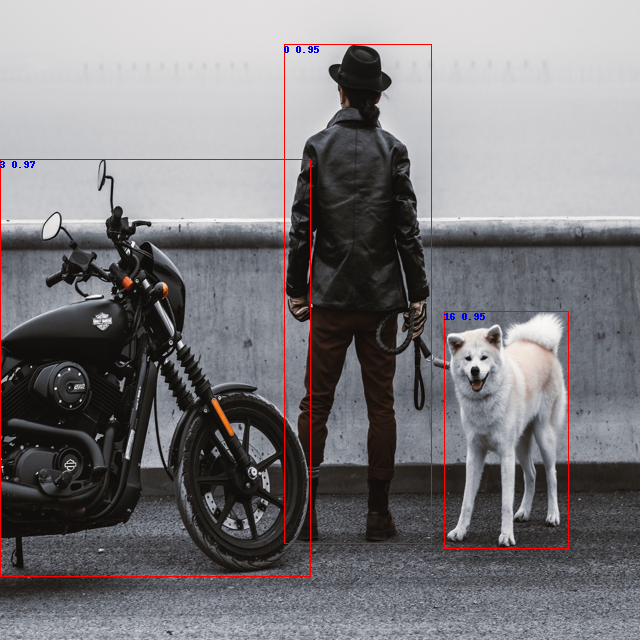

In [29]:
from time import time

img = Image.open('image_02.jpg').convert('RGB')
img = img.resize((640, 640))
img_tensor = ToTensor()(img)[None]
size = torch.tensor([[640, 640]])

images = img_tensor.data.numpy()
orig_target_sizes = size.data.numpy()

t0 = time()
output = sesssion.run(
    output_names=None,
    input_feed={'images': images, "orig_target_sizes": orig_target_sizes}
)
print("time = ", (time() - t0)*1000, "ms")

labels, boxes, scores = output

print("labels shape =", labels.shape)
print("boxes shape =", boxes.shape)
print("scores shape =", scores.shape)
draw = ImageDraw.Draw(img)
thrh = 0.5

for i in range(img_tensor.shape[0]):

    scr = scores[i]
    lab = labels[i][scr > thrh]
    box = boxes[i][scr > thrh]

    print(i, sum(scr > thrh))

    for s,l,b in zip(scr, lab, box):
        draw.rectangle(list(b), outline='red')
        draw.text((b[0], b[1]), text=f"{l} {s:.2f}", fill='blue')

img